<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/DevOps/GitHub_CI_CD_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_GitHub_Actions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подробное руководство: Создание ASP.NET Core проекта и настройка CI/CD с GitHub Actions

## Оглавление
1. [Подготовка среды разработки](#подготовка-среды)
2. [Создание и структура ASP.NET Core решения](#создание-проекта)
3. [Настройка проекта и написание тестов](#настройка-проекта)
4. [Инициализация Git и настройка репозитория](#инициализация-git)
5. [Создание репозитория на GitHub](#создание-репозитория)
6. [Настройка GitHub Actions для CI](#настройка-ci)
7. [Настройка CD для деплоя](#настройка-cd)
8. [Тестирование всего пайплайна](#тестирование-пайплайна)

## <a name="подготовка-среды"></a>1. Подготовка среды разработки

### Установка необходимого ПО

**1. Установка .NET SDK:**
.NET SDK — это комплект разработчика, содержащий все необходимое для создания и запуска .NET приложений.

- Перейдите на [официальный сайт .NET](https://dotnet.microsoft.com/download)
- Скачайте и установите последнюю версию .NET SDK (рекомендуется 8.0 или новее)
- После установки проверьте корректность установки в терминале/командной строке:
```bash
dotnet --version
# Вы должны увидеть номер установленной версии, например: 8.0.201
```

**2. Установка Visual Studio Code:**
VS Code — это легковесный, но мощный редактор кода с богатой экосистемой расширений.

- Скачайте с [официального сайта](https://code.visualstudio.com/)
- Установите следующие расширения для C# разработки:
  - **C#** (от Microsoft) — основная поддержка языка
  - **NuGet Package Manager** — управление пакетами
  - **.NET Core Test Explorer** — запуск и отладка тестов
  - **GitLens** — расширенная работа с Git

**3. Установка и настройка Git:**
Git — система контроля версий, необходимая для работы с GitHub Actions.

- Скачайте с [git-scm.com](https://git-scm.com/)
- Настройте глобальные параметры:
```bash
git config --global user.name "Ваше Имя"
git config --global user.email "ваш.email@example.com"
git config --global init.defaultBranch main
```


## <a name="создание-проекта"></a>2. Создание и структура ASP.NET Core решения

### Шаг 1: Создание структуры папок
```bash
# Создаем основную директорию для нашего решения
mkdir MyAspNetCoreApp
cd MyAspNetCoreApp
```



### Шаг 2: Создание файла решения
Файл решения (.sln) помогает управлять несколькими проектами в одной кодовой базе.
```bash
# Создаем файл решения
dotnet new sln -n MyAspNetCoreSolution
```



### Шаг 3: Создание WebAPI проекта
```bash
# Создаем новый WebAPI проект с целевой платформой .NET 9.0
dotnet new webapi -n MyWebApi --framework net9.0

# Добавляем проект в решение
dotnet sln add MyWebApi/MyWebApi.csproj
```


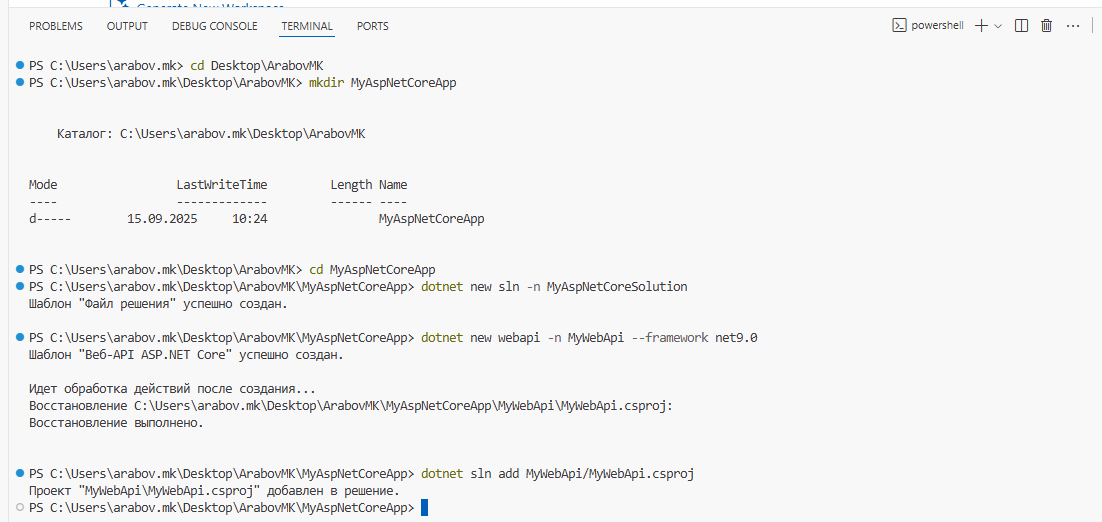


### Шаг 3: Проверка структуры проекта
```bash
tree /F
```
Должны увидеть:


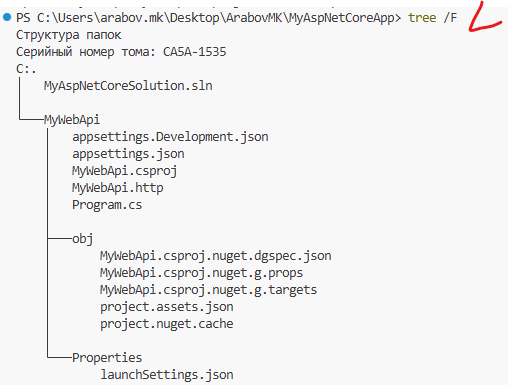

Открыть проект

```bash
code ..
```

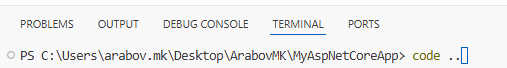


### Шаг 4: Тестовый запуск
```bash
dotnet run
```
Откройте браузер и перейдите по `http://localhost:5000/weatherforecast`




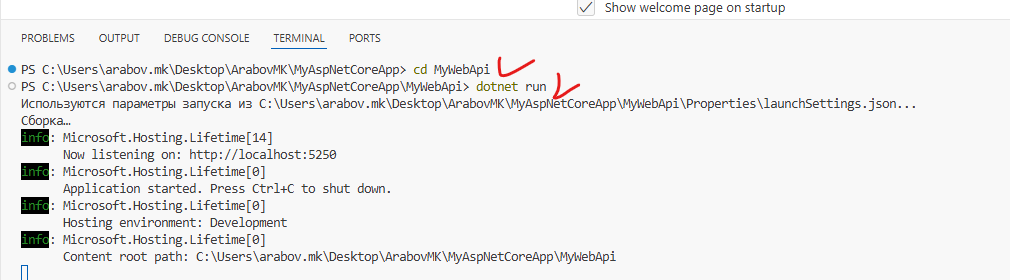


**Важно:** Приложение будет работать до тех пор, пока вы не остановите его сочетанием клавиш `Ctrl+C`.

Откройте браузер и перейдите по адресу:
- `http://localhost:5000/weatherforecast` (HTTP)
- `https://localhost:7000/weatherforecast` (HTTPS)

Вы должны увидеть JSON-ответ с прогнозом погоды, подобный этому:


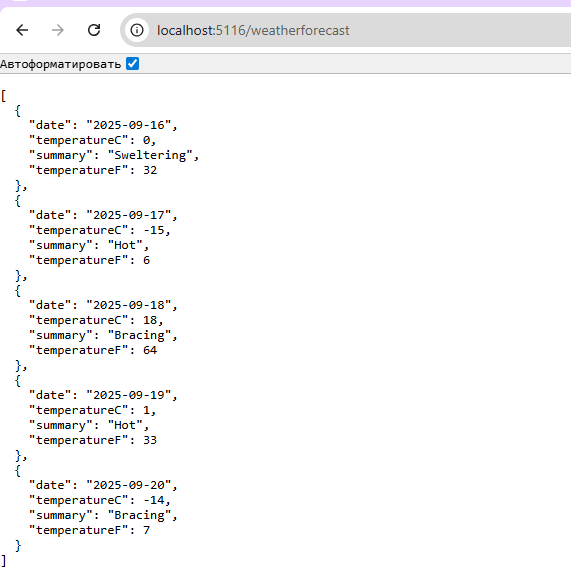


# Настройка проекта и тестирование (для .NET 9)

## <a name="настройка-проекта"></a>3. Настройка проекта и тестирование

### Шаг 1: Добавление тестового проекта

В корневой папке (там, где лежит решение):

```bash
# Создаём тестовый проект на xUnit
dotnet new xunit -n MyWebApi.Tests

# Переходим в папку тестов
cd MyWebApi.Tests

# Добавляем ссылку на основной проект
dotnet add reference ../MyWebApi/MyWebApi.csproj

# Добавляем пакет для интеграционного тестирования ASP.NET Core
dotnet add package Microsoft.AspNetCore.Mvc.Testing --version 9.0.0
```



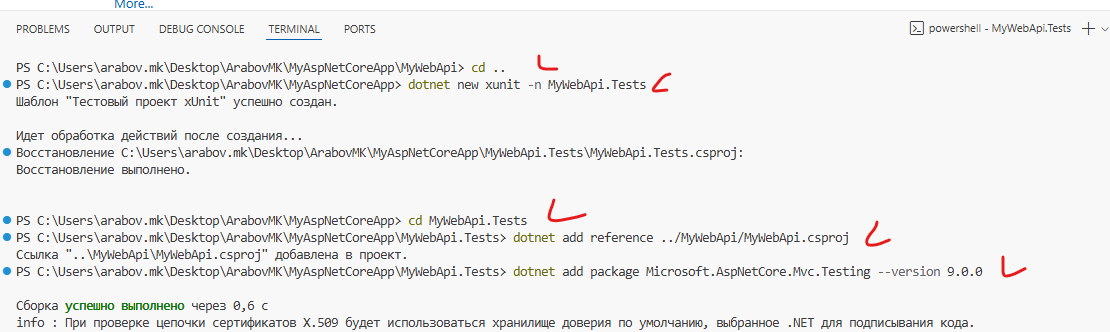



### Шаг 2: Настройка `Program.cs` для тестов

В конце файла `MyWebApi/Program.cs` добавьте строку:

```csharp
public partial class Program { }
```

Это нужно, чтобы тестовый проект мог использовать `WebApplicationFactory<Program>`.




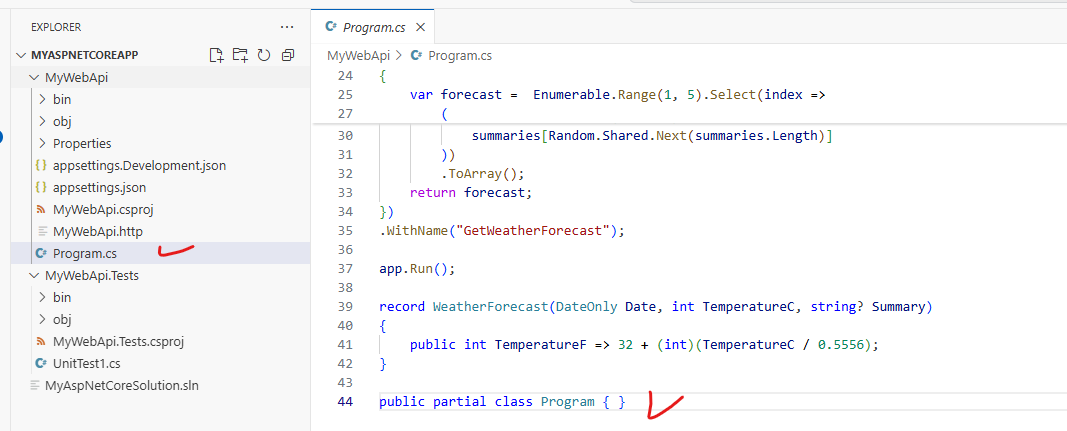


### Шаг 3: Настройка тестового проекта (`MyWebApi.Tests.csproj`)

Файл `MyWebApi.Tests/MyWebApi.Tests.csproj` должен выглядеть примерно так:

```xml
<Project Sdk="Microsoft.NET.Sdk">

  <PropertyGroup>
    <TargetFramework>net9.0</TargetFramework>
    <ImplicitUsings>enable</ImplicitUsings>
    <Nullable>enable</Nullable>
    <IsPackable>false</IsPackable>
  </PropertyGroup>

  <ItemGroup>
    <PackageReference Include="coverlet.collector" Version="6.0.2" />
    <PackageReference Include="Microsoft.AspNetCore.Mvc.Testing" Version="9.0.0" />
    <PackageReference Include="Microsoft.NET.Test.Sdk" Version="17.12.0" />
    <PackageReference Include="xunit" Version="2.9.2" />
    <PackageReference Include="xunit.runner.visualstudio" Version="2.8.2" />
  </ItemGroup>

  <ItemGroup>
    <Using Include="Xunit" />
  </ItemGroup>

  <ItemGroup>
    <ProjectReference Include="..\MyWebApi\MyWebApi.csproj" />
  </ItemGroup>

</Project>

```



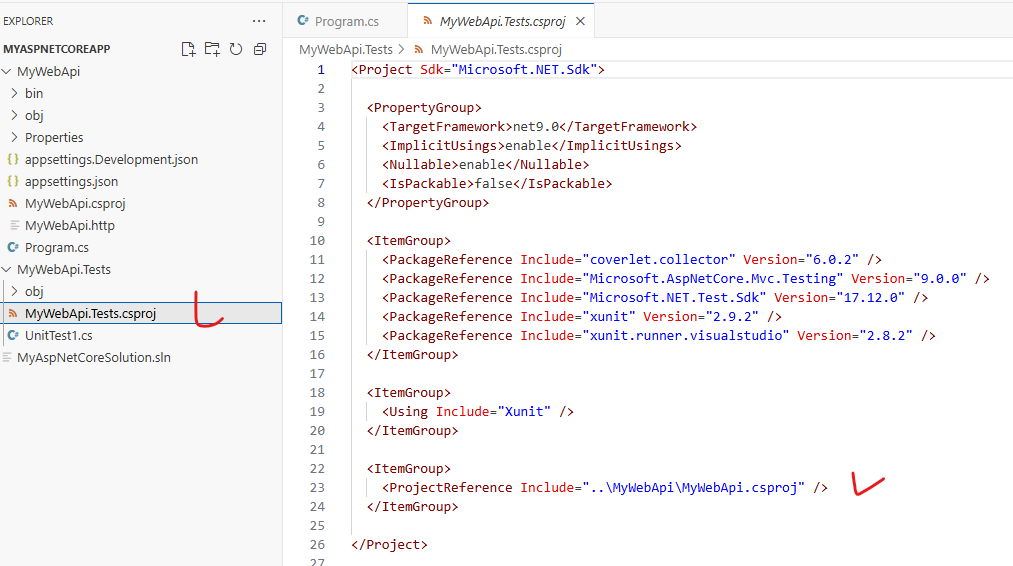



### Шаг 4: Создание теста

Откройте файл `MyWebApi.Tests/UnitTest1.cs` и замените содержимое на:

```csharp
using Microsoft.AspNetCore.Mvc.Testing;
using System.Net;
using Xunit;

namespace MyWebApi.Tests
{
    public class UnitTest1 : IClassFixture<WebApplicationFactory<Program>>
    {
        private readonly WebApplicationFactory<Program> _factory;

        public UnitTest1(WebApplicationFactory<Program> factory)
        {
            _factory = factory;
        }

        [Fact]
        public async Task GetWeatherForecast_ReturnsSuccess()
        {
            // Arrange
            var client = _factory.CreateClient();

            // Act
            var response = await client.GetAsync("/weatherforecast");

            // Assert
            response.EnsureSuccessStatusCode();
            Assert.Equal(HttpStatusCode.OK, response.StatusCode);
        }
    }
}
```



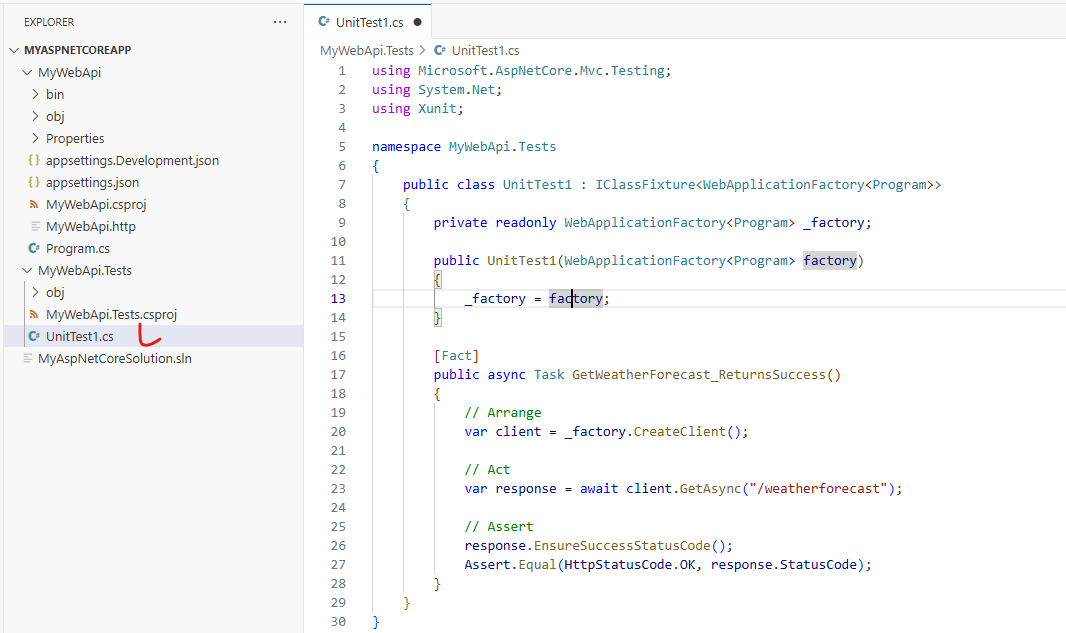



### Шаг 5: Добавление в решение

Если у тебя ещё нет `.sln` файла — создаём. Если есть, просто добавляем тестовый проект:

```bash
# Создаём файл решения (если не был создан раньше)
dotnet new sln -n MyAspNetCoreSolution

# Добавляем проекты в решение
dotnet sln add MyWebApi/MyWebApi.csproj
dotnet sln add MyWebApi.Tests/MyWebApi.Tests.csproj
```




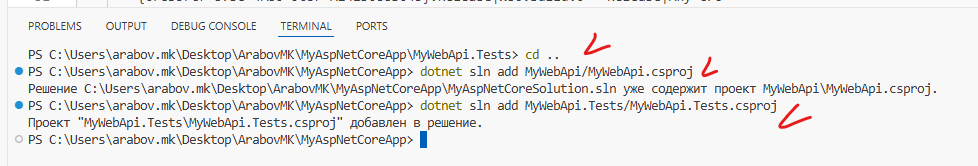



### Шаг 6: Запуск тестов

Выполни команду в корне решения:

```bash
dotnet test
```

Ожидаемый результат:

```
Passed!  - Failed: 0, Passed: 1, Skipped: 0, Total: 1
```


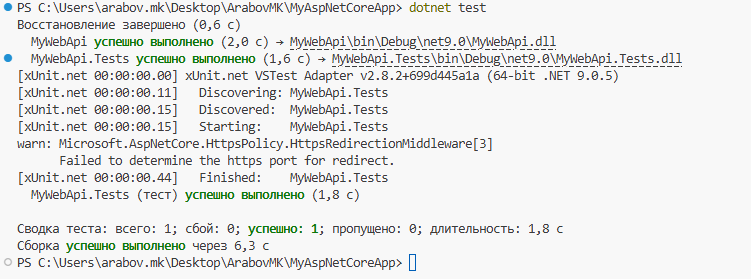



## <a name="создание-репозитория"></a>4. Создание репозитория на GitHub

### Шаг 1: Инициализация Git (если ещё не сделано)

Убедитесь, что вы находитесь в корневой папке решения:

```bash
cd MyAspNetCoreApp

# Инициализируем Git репозиторий
git init

# Проверяем текущий статус
git status
```



### Шаг 2: Создание оптимального `.gitignore`

Создадим стандартный файл для .NET и дополним его:

```bash
# Создаём базовый .gitignore для .NET
dotnet new gitignore

# Расширяем его дополнительными исключениями
cat >> .gitignore << EOF

# IDE и редакторы
.vscode/
.vs/
*.user
*.suo
*.swp
*.swo

# Системные файлы
.DS_Store
Thumbs.db

# Локальные настройки
appsettings.Development.json
appsettings.Local.json

# Логи и временные файлы
*.log
*.tmp
*.cache

# Деплой и публикация
publish/
deploy/
bin/Release/
obj/Release/
EOF
```



### Шаг 3: Первый коммит

Добавим все файлы и создадим первый коммит:

```bash
git add .

git commit -m "feat: initial commit – ASP.NET Core WebAPI (net9.0) with test suite"

- Created WebAPI project targeting .NET 9.0
- Added xUnit test project with integration tests
- Configured solution structure
- Added comprehensive .gitignore"
```


### Шаг 4: Создание репозитория на GitHub

1. Перейдите на [GitHub.com](https://github.com) и войдите в аккаунт.
2. Нажмите **New repository**).
3. Заполните данные:

   * **Repository name:** `MyAspNetCoreApp`
   * **Description:** `ASP.NET Core Web API (net9.0) with CI/CD pipeline`
   * **Visibility:** `Public` (для учебных проектов — оптимально)
   * ⚠️ **Важно:** не инициализируйте репозиторий с `README`, `.gitignore` или `LICENSE`.
4. Нажмите **Create repository**.



### Шаг 5: Привязка локального репозитория к GitHub

В консоли:

```bash
# Добавляем remote origin (замените YOUR_USERNAME на ваш GitHub username)
git remote add origin https://github.com/YOUR_USERNAME/MyAspNetCoreApp.git

# Устанавливаем основную ветку main (современный стандарт)
git branch -M main

# Пушим изменения на GitHub
git push -u origin main

# Проверяем последние коммиты
git log --oneline -5
```






## <a name="настройка-ci"></a>5. Настройка GitHub Actions для Continuous Integration

### Шаг 1: Создание структуры директорий для workflows
Перейдем в корневую папку проекта:
```bash
# Создаём директории для GitHub Actions
mkdir -p .github/workflows
```



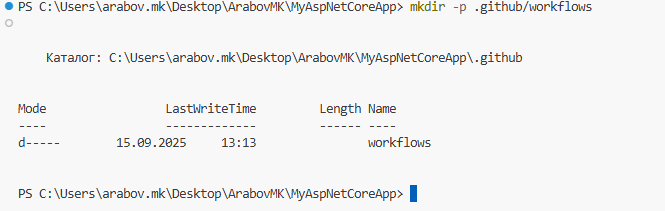


### Шаг 2: Создание CI pipeline

Создайте файл `.github/workflows/dotnet-ci.yml` со следующим содержимым:

```yaml
name: .NET Continuous Integration

on:
  push:
    branches: [ "main", "develop" ]
    paths-ignore:
      - 'README.md'
      - 'docs/**'
      - '**.md'
  pull_request:
    branches: [ "main", "develop" ]
  workflow_dispatch: # Allows manual triggering

env:
  DOTNET_VERSION: '9.0.x'
  SOLUTION_PATH: 'MyAspNetCoreSolution.sln'
  PROJECT_PATH: 'MyWebApi/MyWebApi.csproj'
  TEST_PATH: 'MyWebApi.Tests/MyWebApi.Tests.csproj'

jobs:
  build-and-test:
    name: Build and Test on Ubuntu
    runs-on: ubuntu-latest

    steps:
      - name: Checkout code
        uses: actions/checkout@v4
        with:
          fetch-depth: 0

      - name: Setup .NET
        uses: actions/setup-dotnet@v4
        with:
          dotnet-version: ${{ env.DOTNET_VERSION }}

      - name: Validate dotnet version
        run: dotnet --version

      - name: Restore dependencies
        run: dotnet restore ${{ env.SOLUTION_PATH }}

      - name: Build solution
        run: dotnet build ${{ env.SOLUTION_PATH }} --configuration Release --no-restore --verbosity normal

      - name: Run tests
        run: dotnet test ${{ env.TEST_PATH }} --configuration Release --no-build --verbosity normal --logger "trx;LogFileName=test-results.trx"

      - name: Upload test results
        uses: actions/upload-artifact@v4
        with:
          name: test-results
          path: '**/*.trx'

      - name: Publish application
        run: dotnet publish ${{ env.PROJECT_PATH }} -c Release -o ./publish --no-build

      - name: Upload build artifacts
        uses: actions/upload-artifact@v4
        with:
          name: published-app
          path: ./publish/

      - name: Verify published output
        run: |
          echo "Published files:"
          ls -la ./publish/
          echo "Size of published app:"
          du -sh ./publish/

  build-windows:
    name: Build on Windows
    runs-on: windows-latest
    needs: build-and-test # Runs after Ubuntu job succeeds

    steps:
      - name: Checkout code
        uses: actions/checkout@v4

      - name: Setup .NET
        uses: actions/setup-dotnet@v4
        with:
          dotnet-version: ${{ env.DOTNET_VERSION }}

      - name: Build solution (Windows)
        run: dotnet build ${{ env.SOLUTION_PATH }} --configuration Release --verbosity minimal

```



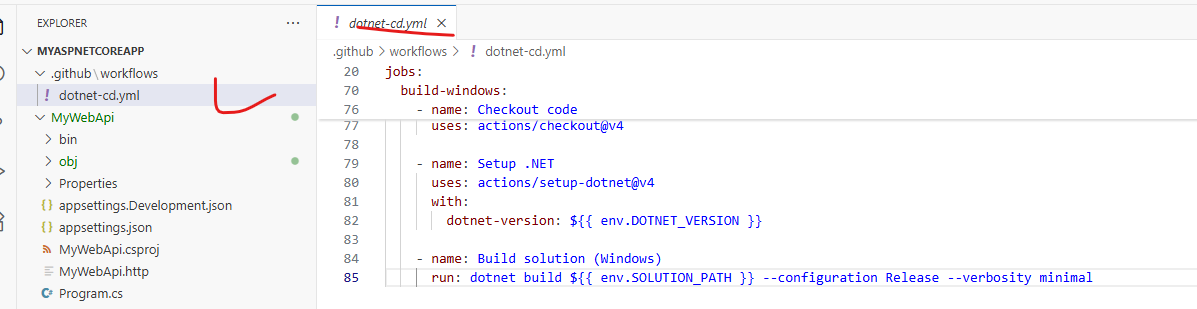



# Объяснение `.github/workflows/dotnet-cd.yml`

## 1. Имя workflow

```yaml
name: .NET Continuous Integration
```

* **name** задаёт имя workflow.
* Это просто метка, которая будет отображаться в GitHub Actions.
* В нашем случае workflow называется **“.NET Continuous Integration”**, то есть это процесс непрерывной интеграции для проекта на .NET.



## 2. События-триггеры

```yaml
on:
  push:
    branches: [ "main", "develop" ]
    paths-ignore:
      - 'README.md'
      - 'docs/**'
      - '**.md'
  pull_request:
    branches: [ "main", "develop" ]
  workflow_dispatch: # Allows manual triggering
```

* **on** указывает, когда запускать workflow.
* **push** — workflow запускается при пуше в указанные ветки (`main` или `develop`).

  * **paths-ignore** — игнорируем изменения в этих файлах/папках, чтобы workflow не запускался каждый раз, когда меняется документация.
* **pull\_request** — workflow запускается при создании PR в этих ветках.
* **workflow\_dispatch** — позволяет запускать workflow вручную через GitHub интерфейс.


## 3. Переменные окружения

```yaml
env:
  DOTNET_VERSION: '9.0.x'
  SOLUTION_PATH: 'MyAspNetCoreSolution.sln'
  PROJECT_PATH: 'MyWebApi/MyWebApi.csproj'
  TEST_PATH: 'MyWebApi.Tests/MyWebApi.Tests.csproj'
```

* **env** создаёт глобальные переменные для workflow.
* Их можно использовать в любом шаге через `${{ env.VARIABLE_NAME }}`.
* Здесь задаём:

  * версию .NET (`DOTNET_VERSION`)
  * путь к файлу решения (`SOLUTION_PATH`)
  * путь к проекту (`PROJECT_PATH`)
  * путь к тестовому проекту (`TEST_PATH`)


## 4. Jobs (Задачи)

Workflow состоит из **jobs** — независимых задач, которые выполняются на виртуальных машинах.

### Job: build-and-test (Ubuntu)

```yaml
jobs:
  build-and-test:
    name: Build and Test on Ubuntu
    runs-on: ubuntu-latest
```

* **name** — название задачи.
* **runs-on** — указывает, на какой ОС будет выполняться job. Здесь — Ubuntu последней версии.


### 4.1 Steps (Шаги)

Каждая job состоит из **steps** — конкретных команд или действий.

#### Checkout code

```yaml
- name: Checkout code
  uses: actions/checkout@v4
  with:
    fetch-depth: 0
```

* Берёт код из репозитория GitHub.
* `fetch-depth: 0` — загружает всю историю git, чтобы можно было работать с ветками и тегами.

#### Setup .NET

```yaml
- name: Setup .NET
  uses: actions/setup-dotnet@v4
  with:
    dotnet-version: ${{ env.DOTNET_VERSION }}
```

* Устанавливает указанную версию .NET на виртуальной машине.
* Мы используем переменную `${{ env.DOTNET_VERSION }}` = 9.0.x.

#### Validate .NET version

```yaml
- name: Validate dotnet version
  run: dotnet --version
```

* Проверка установленной версии .NET.
* В учебных целях: убедиться, что окружение готово.

#### Restore dependencies

```yaml
- name: Restore dependencies
  run: dotnet restore ${{ env.SOLUTION_PATH }}
```

* Восстанавливает все NuGet пакеты проекта.
* Обязательно перед сборкой проекта.

#### Build solution

```yaml
- name: Build solution
  run: dotnet build ${{ env.SOLUTION_PATH }} --configuration Release --no-restore --verbosity normal
```

* Компилирует проект в режиме Release.
* `--no-restore` — не восстанавливать пакеты заново (мы уже сделали restore).

#### Run tests

```yaml
- name: Run tests
  run: dotnet test ${{ env.TEST_PATH }} --configuration Release --no-build --verbosity normal --logger "trx;LogFileName=test-results.trx"
```

* Запускает тесты xUnit.
* `--no-build` — не пересобирать проект.
* `--logger "trx;..."` — сохраняет результаты тестов в формате TRX (для последующей загрузки).

#### Upload test results

```yaml
- name: Upload test results
  uses: actions/upload-artifact@v4
  with:
    name: test-results
    path: '**/*.trx'
```

* Загружает результаты тестов как артефакт workflow.
* Можно скачать для анализа.

#### Publish application

```yaml
- name: Publish application
  run: dotnet publish ${{ env.PROJECT_PATH }} -c Release -o ./publish --no-build
```

* Публикует собранное приложение в папку `./publish`.

#### Upload build artifacts

```yaml
- name: Upload build artifacts
  uses: actions/upload-artifact@v4
  with:
    name: published-app
    path: ./publish/
```

* Загружает собранное приложение как артефакт workflow.

#### Verify published output

```yaml
- name: Verify published output
  run: |
    echo "Published files:"
    ls -la ./publish/
    echo "Size of published app:"
    du -sh ./publish/
```

* Выводит содержимое папки `publish` и размер файлов.
* Полезно для проверки успешной публикации.


### Job: build-windows

```yaml
build-windows:
  name: Build on Windows
  runs-on: windows-latest
  needs: build-and-test
```

* Этот job выполняется **только после успешного завершения Ubuntu job** (`needs: build-and-test`).
* Использует Windows VM.

#### Шаги Windows job

* Checkout, Setup .NET — такие же, как на Ubuntu.
* Build solution — компиляция проекта на Windows (Release, минимальный вывод).



# 📌 Итог

1. Workflow запускается на **push**, **pull request** и вручную.
2. Переменные окружения делают конфигурацию гибкой.
3. Ubuntu job:

   * проверяет код, восстанавливает пакеты, собирает проект, запускает тесты, публикует артефакты.
4. Windows job:

   * проверяет сборку на другой платформе для кроссплатформенной совместимости.
5. Все артефакты и результаты тестов сохраняются для анализа.



### Шаг 3: Коммит и пуш CI конфигурации

```bash
# Добавляем workflow файл
git add .github/workflows/dotnet-ci.yml

# Создаём коммит
git commit -m "ci: add GitHub Actions CI pipeline (net9.0)"

- Build and test on Ubuntu
- Cross-platform validation on Windows
- Artifact publishing for deployment
- Test results reporting"

# Пушим изменения
git push origin main
```


### Шаг 4: Проверка выполнения workflow

1. Перейдите на **GitHub** в ваш репозиторий.
2. Откройте вкладку **Actions** — появится запущенный workflow.
3. Нажмите на конкретный запуск, чтобы просмотреть детали.
4. Убедитесь, что все шаги завершились успешно ✅ (зелёные галочки).



📌 Теперь у нас полноценный CI на **.NET 9.0**, который:

* собирает и тестирует проект,
* публикует артефакты,
* проверяет кроссплатформенность (Ubuntu + Windows).



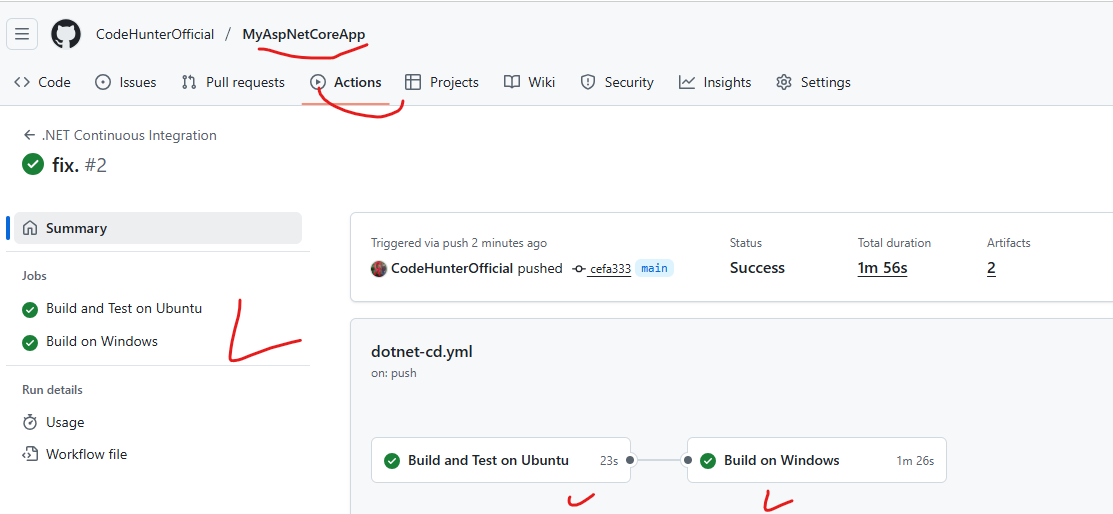


# 6. Настройка Continuous Deployment (CD)

Continuous Deployment (CD) — это процесс **автоматического развертывания приложения** на сервер после успешного прохождения этапа Continuous Integration (CI). Цель — ускорить выпуск новых версий и минимизировать ручные ошибки.


## 6.1 Почему выбираем Heroku

Heroku — это **Platform as a Service (PaaS)**, которая упрощает развертывание приложений .NET без необходимости настраивать сервер вручную.

**Преимущества Heroku:**

1. **Простота:** не нужно настраивать IIS, Nginx или Docker.
2. **Автоматический HTTPS:** встроенные сертификаты SSL.
3. **Быстрый деплой:** интеграция с GitHub Actions.
4. **Публичный URL:** приложение сразу доступно в интернете.
5. **Free tier:** удобно для обучения, тестов и демо-проектов.

**Сравнение с локальным деплоем:**

| Параметр          | Локальный деплой             | CD на Heroku                      |
| ----------------- | ---------------------------- | --------------------------------- |
| Настройка сервера | вручную                      | управляется Heroku                |
| Процесс деплоя    | вручную (копирование файлов) | автоматический через workflow     |
| HTTPS и домены    | настраивается отдельно       | встроено                          |
| Логи и мониторинг | локальные инструменты        | Heroku dashboard и CLI            |
| Масштабируемость  | вручную                      | через Dynos, легко масштабировать |



## 6.2 Шаг 1: Подготовка приложения

Обновите `Program.cs` для корректной работы на Heroku:

```csharp
var builder = WebApplication.CreateBuilder(args);

// Add services
builder.Services.AddControllers();
builder.Services.AddEndpointsApiExplorer();
builder.Services.AddSwaggerGen();

var app = builder.Build();

// Development-only middleware
if (app.Environment.IsDevelopment())
{
    app.UseSwagger();
    app.UseSwaggerUI();
}

// Trust forwarded headers for Heroku proxy
app.UseForwardedHeaders();

app.UseHttpsRedirection();
app.UseAuthorization();
app.MapControllers();

// Serve static files if needed
app.UseDefaultFiles();
app.UseStaticFiles();

app.Run();
```

**Объяснение:**

* `UseForwardedHeaders()` необходим для Heroku, так как запросы проходят через reverse proxy.
* Swagger включен только для Development.
* `UseStaticFiles()` и `UseDefaultFiles()` нужны для обслуживания фронтенда или статических ресурсов.



## 6.3 Шаг 2: Создание Production профиля

Создайте файл `appsettings.Production.json`:

```json
{
  "Logging": {
    "LogLevel": {
      "Default": "Information",
      "Microsoft.AspNetCore": "Warning"
    }
  },
  "AllowedHosts": "*"
}
```

**Объяснение:**

* Настройка отдельных конфигураций для продакшена.
* Контроль уровней логирования и разрешённых хостов.



## 6.4 Шаг 3: Регистрация на Heroku

1. Создайте аккаунт на [heroku.com](https://heroku.com).
2. Установите Heroku CLI:

```bash
# Windows
winget install Heroku.CLI

# macOS
brew install heroku

# Linux
curl https://cli-assets.heroku.com/install.sh | sh
```

3. Авторизуйтесь через CLI:

```bash
heroku login
```

4. Создайте приложение:

```bash
heroku create my-aspnetcore-app-$(date +%s)
# Save the app name from console output
```



## 6.5 Шаг 4: Настройка секретов в GitHub

Добавьте в репозитории GitHub через Settings → Secrets:

* `HEROKU_API_KEY` — API key из Heroku.
* `HEROKU_APP_NAME` — имя вашего Heroku приложения.
* `HEROKU_EMAIL` — email для Heroku.

**Примечание:** Секреты защищают ваши данные и не коммитятся в код.



## 6.6 Шаг 5: Создание CD workflow

Создайте `.github/workflows/dotnet-cd.yml`:

```yaml
name: .NET Continuous Deployment to Heroku

on:
  workflow_run:
    workflows: [".NET Continuous Integration"]
    branches: [main]
    types: [completed]
  workflow_dispatch:  # Allows manual trigger

env:
  HEROKU_APP_NAME: ${{ secrets.HEROKU_APP_NAME }}
  DOTNET_VERSION: '9.0.x'

jobs:
  deploy:
    if: ${{ github.event.workflow_run.conclusion == 'success' }}
    runs-on: ubuntu-latest
    environment: production
    timeout-minutes: 30

    steps:
      - name: Checkout code
        uses: actions/checkout@v4

      - name: Setup .NET
        uses: actions/setup-dotnet@v4
        with:
          dotnet-version: ${{ env.DOTNET_VERSION }}

      - name: Download build artifacts from CI
        uses: actions/download-artifact@v3
        with:
          name: published-app
          path: ./publish

      - name: Verify downloaded artifacts
        run: |
          echo "Contents of publish directory:"
          ls -la ./publish/
          echo "Size: $(du -sh ./publish/)"

      - name: Create runtime configuration for Heroku
        run: |
          cat > ./publish/runtimeconfig.json << EOF
          {
            "runtimeOptions": {
              "tfm": "net9.0",
              "framework": {
                "name": "Microsoft.NETCore.App",
                "version": "9.0.0"
              },
              "configProperties": {
                "System.GC.Server": true,
                "System.Runtime.TieredCompilation": false
              }
            }
          }
          EOF

      - name: Create Procfile for Heroku
        run: echo "web: ./MyWebApi --urls http://+:\$PORT" > ./publish/Procfile

      - name: Deploy to Heroku
        uses: akhileshns/heroku-deploy@v3.12.12
        with:
          heroku_api_key: ${{ secrets.HEROKU_API_KEY }}
          heroku_app_name: ${{ secrets.HEROKU_APP_NAME }}
          heroku_email: ${{ secrets.HEROKU_EMAIL }}
          appdir: "./publish"
          usedocker: false
          rollbackonhealthcheckfailed: false

      - name: Verify deployment
        run: |
          echo "Waiting for deployment to complete..."
          sleep 15
          curl -f "https://${{ secrets.HEROKU_APP_NAME }}.herokuapp.com/weatherforecast" || \
          curl -f "https://${{ secrets.HEROKU_APP_NAME }}.herokuapp.com" || \
          echo "Application might be starting..."

      - name: Deployment status
        run: |
          echo "✅ Application deployed successfully to Heroku!"
          echo "🌐 URL: https://${{ secrets.HEROKU_APP_NAME }}.herokuapp.com"
          echo "📋 Health check: https://${{ secrets.HEROKU_APP_NAME }}.herokuapp.com/weatherforecast"
```

**Объяснение:**

* Workflow срабатывает после успешного CI.
* Загружаются артефакты из CI для деплоя — **сборка не повторяется**.
* `Procfile` и `runtimeconfig.json` нужны для работы .NET приложения на Heroku.
* Health check через `curl` проверяет, что приложение работает.



## 6.7 Шаг 6: Коммит и пуш CD конфигурации

```bash
git add .github/workflows/dotnet-cd.yml
git add Program.cs
git add appsettings.Production.json

git commit -m "ci: add CD pipeline for Heroku deployment

- Heroku deployment configuration
- Runtime configuration for production
- Health check verification
- Manual trigger support"

git push origin main
```

**Объяснение:** Все изменения закоммичены, чтобы GitHub Actions мог их использовать.



## <a name="тестирование-пайплайна"></a>7. Тестирование всего пайплайна CI/CD

### Шаг 1: Внесение тестовых изменений

Добавьте новый endpoint в `Controllers/WeatherForecastController.cs`:

```csharp
[ApiController]
[Route("[controller]")]
public class WeatherForecastController : ControllerBase
{
    // ... существующий код ...

    [HttpGet("health")]
    public IActionResult GetHealth()
    {
        return Ok(new {
            status = "Healthy",
            timestamp = DateTime.UtcNow,
            version = "1.0.0",
            environment = Environment.GetEnvironmentVariable("ASPNETCORE_ENVIRONMENT") ?? "Production"
        });
    }

    [HttpGet("ci-cd-test")]
    public IActionResult GetCiCdTest()
    {
        return Ok(new {
            message = "CI/CD Pipeline is working perfectly! 🚀",
            deployedAt = DateTime.UtcNow,
            commitHash = Environment.GetEnvironmentVariable("HEROKU_SLUG_COMMIT") ?? "local"
        });
    }
}
```

### Шаг 2: Добавление соответствующих тестов

Обновите `MyWebApi.Tests/UnitTest1.cs`:

```csharp
[Fact]
public async Task GetHealth_ReturnsHealthyStatus()
{
    // Arrange
    var client = _factory.CreateClient();

    // Act
    var response = await client.GetAsync("/weatherforecast/health");
    var content = await response.Content.ReadAsStringAsync();

    // Assert
    response.EnsureSuccessStatusCode();
    Assert.Contains("Healthy", content);
    Assert.Contains("version", content);
}

[Fact]
public async Task GetCiCdTest_ReturnsSuccessMessage()
{
    // Arrange
    var client = _factory.CreateClient();

    // Act
    var response = await client.GetAsync("/weatherforecast/ci-cd-test");
    var content = await response.Content.ReadAsStringAsync();

    // Assert
    response.EnsureSuccessStatusCode();
    Assert.Contains("CI/CD Pipeline is working", content);
}
```

### Шаг 3: Запуск полного пайплайна
```bash
# Добавляем изменения
git add .
git commit -m "test: add health endpoints and tests for CI/CD verification

- Health check endpoint for monitoring
- CI/CD test endpoint for pipeline verification
- Additional test coverage"

# Пушим и запускаем полный пайплайн
git push origin main
```

### Шаг 4: Мониторинг и верификация

1. **Отслеживайте выполнение в GitHub Actions:**
   - CI пайплайн запустится сразу после push
   - CD пайплайн запустится после успешного CI

2. **Проверьте деплой:**
   ```bash
   # После завершения CD пайплайна
   curl "https://$HEROKU_APP_NAME.herokuapp.com/weatherforecast/ci-cd-test"
   curl "https://$HEROKU_APP_NAME.herokuapp.com/weatherforecast/health"
   ```

3. **Убедитесь, что:**
   - ✅ Все тесты проходят
   - ✅ Сборка успешна на обеих ОС
   - ✅ Деплой выполнен без ошибок
   - ✅ Все endpoints работают корректно

## Решение распространенных проблем

### Проблема: Heroku deployment fails
**Решение:** Добавьте в `MyWebApi.csproj`:
```xml
<PropertyGroup>
  <PublishReadyToRun>true</PublishReadyToRun>
  <PublishTrimmed>false</PublishTrimmed>
</PropertyGroup>
```

### Проблема: Port binding issues on Heroku
**Решение:** Убедитесь, что Procfile содержит:
```
web: ./MyWebApi --urls http://+:$PORT
```

### Проблема: Environment configuration
**Решение:** Добавьте в Heroku config vars через dashboard:
```
ASPNETCORE_ENVIRONMENT=Production
```
